<a href="https://colab.research.google.com/github/sergiocabrales/python/blob/main/DoubleExponentialMovingAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the Double Exponential Moving Average (DEMA) to determine when to buy and sell stock
#Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2021-01-01', end='2021-04-28')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.216919
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.852966
...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.940002
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.320007
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.720001


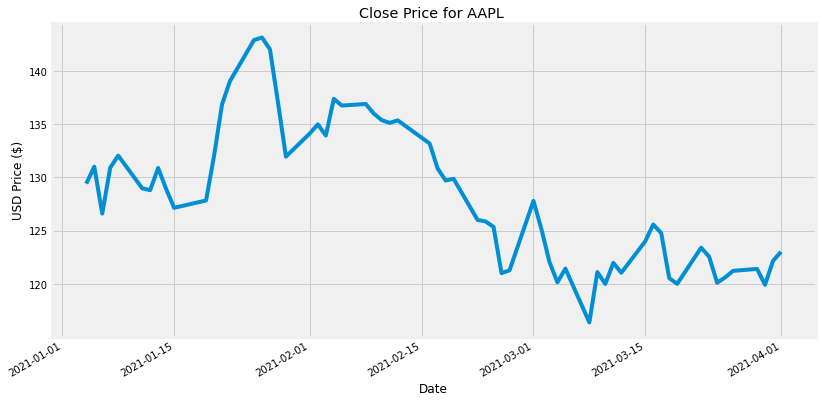

In [ ]:
#Visually show the close price
df['Close'].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('Close Price for AAPL ')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

In [ ]:
#Create a function to calculate the Double Exponential Moving Average (DEMA)
def DEMA(data, time_period, column):
  #Calculate the Exponential Moving Average for some time_period (in days)
  EMA = data[column].ewm(span=time_period, adjust=False).mean()
  #Calculate the DEMA
  DEMA = 2*EMA - EMA.ewm(span=time_period, adjust=False).mean()
  return DEMA

In [ ]:
df['DEMA_short'] = DEMA(df, 20, 'Close') #Store the short term DEMA
df['DEMA_long'] = DEMA(df, 50, 'Close') #Store the long term DEMA

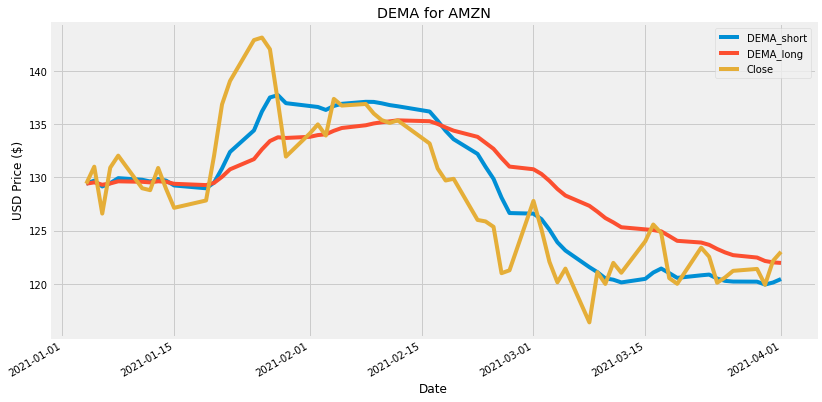

In [ ]:
#Plot the chart
#Create a list of columns to keep
column_list = ['DEMA_short', 'DEMA_long', 'Close']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('DEMA for AMZN')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [ ]:
def DEMA_Strategy(data):
  buy_list = [] #Create a list to store the price at which to buy
  sell_list = [] #Create a list to store the price at which to sell
  flag =  False #Create a flag to determine when the indicators cross
  #Loop through the data
  for i in range(0,len(data)):
      #Check if the Short Term DEMA crosses above the Long Term DEMA
      if data['DEMA_short'][i]  > data['DEMA_long'][i] and flag == False:
          buy_list.append(data['Close'][i])
          sell_list.append(np.nan)
          flag = True
      #Check if the Short Term DEMA crosses below the Long Term DEMA    
      elif data['DEMA_short'][i]  < data['DEMA_long'][i] and flag == True:
          buy_list.append(np.nan)
          sell_list.append(data['Close'][i])
          flag = False
      else:#Else they didn't cross
          buy_list.append(np.nan)
          sell_list.append(np.nan)
  #Store the Buy and Sell signals in the data set
  data['Buy'] = buy_list
  data['Sell'] = sell_list

In [ ]:
#Run the Strategy to get the buy and sell signals
DEMA_Strategy(df)

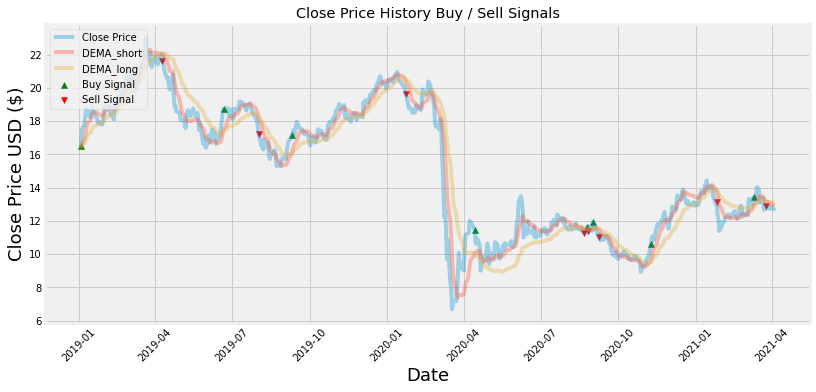

In [ ]:
# Visually Show The Stock Buy and Sell Signals
#Create and plot the graph
plt.figure(figsize=(12.2,5.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1) #Plot the buy signal
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1) #Plot the sell signal
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( df['DEMA_short'],  label='DEMA_short', alpha = 0.35) #plot the Short Term DEMA
plt.plot( df['DEMA_long'],  label='DEMA_long', alpha = 0.35) #plot the Long Term DEMA
plt.xticks(rotation=45)#Rotate the dates 45 degrees
plt.title('Close Price History Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()